In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import _pickle as cp
import os, sys

In [2]:
ROOT_DIR = "/mnt/neurogeriatrics_data/Keep Control/Data/lab dataset/rawdata" if sys.platform == "linux" else "Z:\\Keep Control\\Data\\lab dataset\\rawdata"

In [2]:
with open("test_set_and_predictions.pkl", 'rb') as infile:
    ds_test = cp.load(infile)

In [30]:
for ix_example, _ in enumerate(ds_test[:1]):
    # Get subject id
    sub_id = ds_test[ix_example]["filename_prefix"][:9]

    # Load corresponding reflective marker data
    df_omc = pd.read_csv(os.path.join(ROOT_DIR, sub_id, "motion", ds_test[ix_example]["filename_prefix"]+"_tracksys-omc_motion.tsv"), header=0, sep="\t")

    # Load annotated gait events
    df_events = pd.read_csv(os.path.join(ROOT_DIR, sub_id, "motion", ds_test[ix_example]["filename_prefix"]+"_events.tsv"), header=0, sep="\t")

    # Get start and end of 5 meter distance
    ix_start = df_events[df_events["event_type"]=="start"]["onset"].values[0]
    ix_end = df_events[df_events["event_type"]=="stop"]["onset"].values[0]
    ix_ICL = df_events[df_events["event_type"]=="initial_contact_left"]["onset"].values[:]
    ix_FCL = df_events[df_events["event_type"]=="final_contact_left"]["onset"].values[:]


In [15]:
df_omc.head()

,l_toe_POS_x,l_toe_POS_y,l_toe_POS_z,l_toe_POS_err,l_heel_POS_x,l_heel_POS_y,l_heel_POS_z,l_heel_POS_err,l_ank_POS_x,l_ank_POS_y,...,start_2_POS_z,start_2_POS_err,end_1_POS_x,end_1_POS_y,end_1_POS_z,end_1_POS_err,end_2_POS_x,end_2_POS_y,end_2_POS_z,end_2_POS_err
0,721.632491,736.705771,36.759688,1.951559,494.009627,612.574900,43.596295,1.317920,526.527934,681.969357,...,78.504029,1.851773,5885.059608,829.131466,56.881877,2.745605,5725.144463,1736.303494,61.689345,2.573608
1,721.616060,736.695640,36.777914,1.949771,494.036122,612.642007,43.546422,1.362317,526.529608,681.951612,...,78.503307,1.863224,5885.056612,829.173600,56.884810,2.735420,5725.182201,1736.297553,61.751942,2.604943
2,721.649802,736.708175,36.769623,1.944381,494.029851,612.640281,43.575382,1.352544,526.531878,681.954410,...,78.498485,1.853228,5885.011969,829.205505,56.878521,2.718339,5725.163937,1736.343139,61.724738,2.603191
3,721.631908,736.725078,36.767294,1.951664,494.003665,612.608063,43.603816,1.330851,527.856094,681.426073,...,78.491127,1.860073,5885.057588,829.209156,56.891917,2.724456,5725.190004,1736.311722,61.719457,2.601524
4,721.657993,736.907107,36.810434,1.960111,494.123139,612.727564,43.396727,1.324975,527.698571,681.392688,...,78.659866,1.850820,5884.828967,828.934471,57.222217,2.813063,5724.623412,1736.194998,62.621315,2.717849


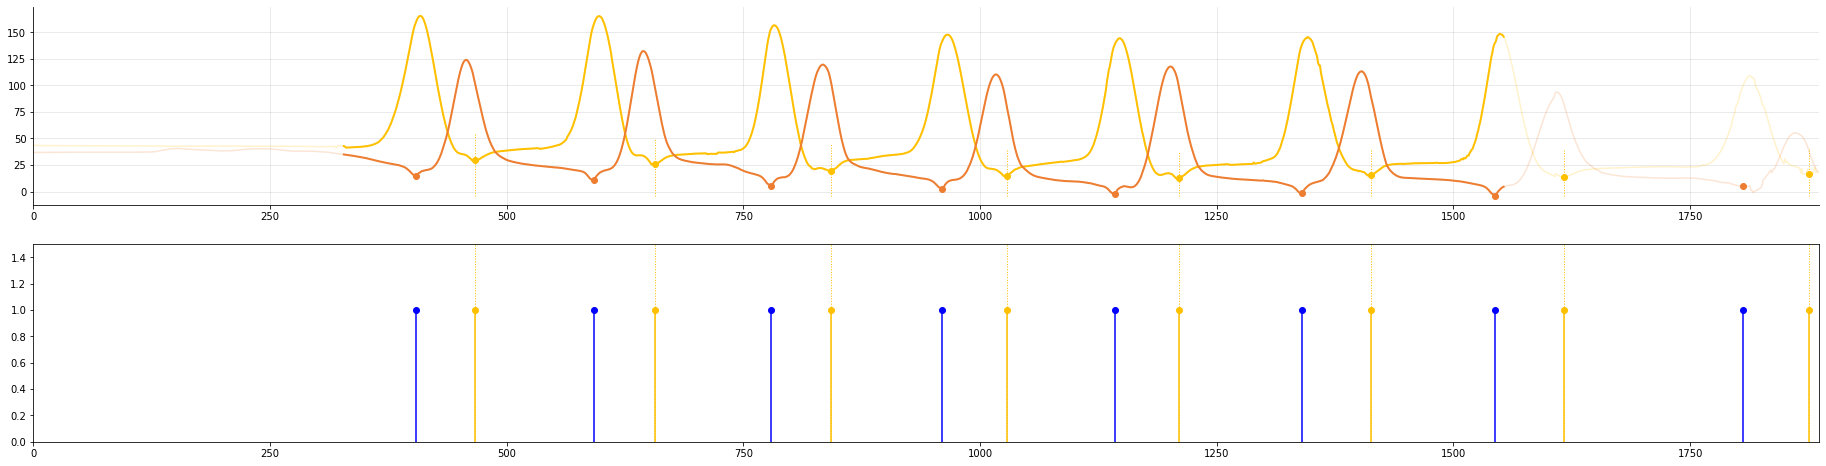

In [50]:
fig, axs = plt.subplots(2, 1, figsize=(32, 8))
axs[0].plot(df_omc["l_heel_POS_z"], c=(255/255, 192/255, 0/255), alpha=0.2)
axs[0].plot(df_omc["l_heel_POS_z"].iloc[ix_start:ix_end], ls='-', lw=2, c=(255/255, 192/255, 0/255))
axs[0].plot(ix_ICL, df_omc["l_heel_POS_z"].iloc[ix_ICL], ls="none", marker="o", mfc=(255/255, 192/255, 0/255), mec=(255/255, 192/255, 0/255))
for i in range(len(ix_ICL)):
    axs[0].plot([ix_ICL[i], ix_ICL[i]], [df_omc[["l_heel_POS_z", "l_toe_POS_z"]].min().min(), df_omc["l_heel_POS_z"].iloc[ix_ICL[i]]+25], ls=':', lw=1, c=(255/255, 192/255, 0/255))
    axs[1].plot([ix_ICL[i], ix_ICL[i]], [0, 1.5], ls=':', lw=1, c=(255/255, 192/255, 0/255))
axs[0].plot(df_omc["l_toe_POS_z"], c=(237/255, 125/255, 49/255), alpha=0.2)
axs[0].plot(df_omc["l_toe_POS_z"].iloc[ix_start:ix_end], ls='-', lw=2, c=(237/255, 125/255, 49/255))
axs[0].plot(ix_FCL, df_omc["l_toe_POS_z"].iloc[ix_FCL], ls="none", marker="o", mfc=(237/255, 125/255, 49/255), mec=(237/255, 125/255, 49/255))
axs[0].set_xlim([0, len(df_omc)])
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[0].grid(which="both", axis="both", c=(0, 0, 0), alpha=0.1)

for i in range(len(ix_ICL)):
    axs[1].plot([ix_ICL[i], ix_ICL[i]], [0, 1], ls='-', c=(255/255, 192/255, 0/255))
    axs[1].plot([ix_ICL[i]], [1.], ls="none", marker="o", mfc=(255/255, 192/255, 0/255), mec=(255/255, 192/255, 0/255))
for i in range(len(ix_FCL)):
    axs[1].plot([ix_FCL[i], ix_FCL[i]], [0, 1], 'b-')
    axs[1].plot([ix_FCL[i]], [1.], ls="none", marker="o", mfc="b", mec="b")
axs[1].set_xlim([0, len(df_omc)])
axs[1].set_ylim([0, 1.5])
plt.show()